## Loading files

Assuming you have uploaded a **file** (except for a Python code file) 
to your Google Drive, here is the way to go.

This will only work in a google colab or if you've installed Googl;e Drive interface (which is not a standard Python or Anaconda module,
and can only be installed through pip).

Mounted at /content/gdrive


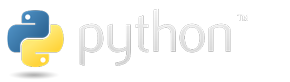

In [1]:
# Primary method
from IPython.display import Image
from google.colab import drive
drive.mount('/content/gdrive') 
Image(filename='/content/gdrive/My Drive/python-logo.png', width=350)

We will use this basic idea in the code below.

## Loading/importing Python code files

We present two solutions, one for code  you have uploaded on google drive, one for code somewhere on your local machine.  The idea
is to highlight the similarities.

In this example we will assume you have placed the following three files either in one folder on your local machine or in one folder
on your Google Drive.

1. [read_in_census_data.py](https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/_static/read_in_census_data.py)
2. 5%_PUMS_record_layout.xls
3. [PUMS data for Alabam 1% 2010](https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/_static/revisedpums1_alabama_01.txt)

This link to [pums_example.zip](https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/_static/pums_example.zip) leads to a zipfile containing all three of these files.

First the imports common to both situations.

**Execute the next cell.**

In [2]:
import importlib.util
import os.path

### Situation 1: Code file is local

First and foremost identify the full path to the directory/folder of the code file.

Here's all you need to do assuming the 
code file is on your local machine:

In [ ]:
# If this were an installed python module you would have done.
# import read_in_census_data as census
# Instead identify the code_dir to prepare for importing it.
code_dir = '/Users/gawron/Desktop/src/sphinx/python_for_ss/ipython_notebooks/pandas'

## Situation 2: Code file is on your Google drive

Now let's assume you're using google colab and you have the Python files on your google drive, in a folder called `census`.

First you mount the google drive (assuming it's not already mounted
because of soem previous data/code loading action). Then
identify the path through the mounted filesystem to your 
code folder.

In [3]:
from google.colab import drive

# Mount google drive to create a filesystem the notebook can use
drive.mount('/content/gdrive') 
# Specify the code dir in the new filesystem.
code_dir ='/content/gdrive/My Drive/census/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**You have executed only one of the two previous code cells.**

Whichever way you've specified the code_dir, you can now execute the
next cells which import the module.

What is going under the hood is complicated because it involves Python's implementation of the import method, but the details are not terribly important here; the point is to a limited extent we can have Python files anywhere on our file system behave just like imported modules, providing access to all their functions, if we do the following:

In [4]:
filename = os.path.join(code_dir, 'read_in_census_data.py')
spec = importlib.util.spec_from_file_location("census", filename)
# Name for imported module will be census
census = importlib.util.module_from_spec(spec)
spec.loader.exec_module(census)

In [5]:
census

<module 'census' from '/content/gdrive/My Drive/census/read_in_census_data.py'>

For simplicity, let's assume the data files and the code files
are in the same place.

In [7]:
#foo.MyClass()

data_dir =code_dir
one_percent_data_file = os.path.join(data_dir,
                                     'revisedpums1_alabama_01.txt')
data_dictionary = os.path.join(data_dir,
                               '5%_PUMS_record_layout.xls')
ci = census.CensusInfo (data_dictionary)
df = census.DataFrameWrapper(ci)

Processing 'Housing Unit Record' Sheet

Processing 'Person Record' Sheet



In [8]:
# we select a subset of the columns.
df.fill_frame ([], ci.person_record, one_percent_data_file, ci.one_percent_file, \
                'race','education','income','gender','age','relationship')
df.rows[:5]

[['0000117', '47', '12', '047300', '1', '31', '01'],
 ['0000117', '47', '12', '024300', '2', '25', '02'],
 ['0000117', '47', '00', '      ', '1', '00', '03'],
 ['0000127', '47', '05', '000000', '1', '22', '01'],
 ['0000127', '47', '10', '022000', '2', '35', '02']]

## URL data

The method for downloading data from a URL changes with the tool you are
using, teh dta format, and also, I'm afraid, the place you are downloading data from.

This discussion will thius necessarili be incomplete.

To get started, here are two examples of using pandas with github data, since we use that a fair amount.

Here's the github URL you would normally visit with your browser to download the data for the first example

```
https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/data/Seattle2014.csv.
```

Suppose you have visited this github page with your browser. If you now click  on the `Raw` button at the top of the file display,  you will see a "raw" rendering of the file (CSV format in this case). At the same time the URL changes to 

```
https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/Seattle2014.csv.
```
This is the URL we want to use to load github data into a notebook file.  Note the url sitename is now `raw.githubusercontent.com`. Note also the disappearance of `'blob'` from the path.  The term "blob" refers to a **large binary object**, the object type used to store the contents of each file in a Github repository.; see [this github developer page](https://developer.github.com/v3/git/blobs/) for more details.


In [9]:
import pandas as pd 
url = 'https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data'
fn = 'Seattle2014.csv'
path = f'{url}/{fn}'
rainfall = pd.read_csv(path)['PRCP'].values

In line 5, you got the `'PRCP'` column in the Rainfall data `DataFrame`, which is a `Series`, and then just extracted
the raw numerical values (`.values`) from that, which gave you a `numpy` `ndarray` of dimension 1.

In [10]:
print(type(rainfall))
rainfall[:10]

<class 'numpy.ndarray'>


array([  0,  41,  15,   0,   0,   3, 122,  97,  58,  43])

Next, we retrieve the complaints data used in one of the pandas noteboks on github.

In [ ]:
import pandas as pd
fn = '311-service-requests.csv'
base_url = 'https://github.com/gawron/pandas-cookbook/master/data'
path = f'{base_url}/{fn}'
raw_path = path.replace('github.com','raw.githubusercontent.com')
sr_pdf = pd.read_csv(raw_path,error_bad_lines=False)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
sr_pdf

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,NaN,NaN,NaN,Na

## Loading compressed data 

### From a URL

Although it's the more complicated case, we will execute the the remote extraction first, because we will save the results on our google drive to demo local extraction.  By remote extraction,
I mean extracting data from a file archive somewhere on the web.  By lcoal extrtaction I mean extracting files from a from a file archive on your local machine.

The basic idea of using the `tarfile` is that `tarfile.open` opens a **tar** archive (one of many file archive formats) just like any file, and provides an object
that reads the files in the archive and writes them in a local directory.   In the code below no path information is provided so the files are written to
whatever directory Python is connected to at the time of
execution.  Also when the mode is simply
"r", the default, no decompression is done.

```
import tarfile

def extract_files (thetarfile, mode = "r"):
  """
  Extract all files from file path `thetarfile`.
  Default mode assumes uncompressed archive.
  """
  with tarfile.open(thetarfile, mode=mode) as thetarstream:
    # tarhdandle is a TarFile inst
    # Extract all files into current directory
    thetarstream.extractall()
```

In the code below, we extend this idea to define a function for remote extraction.

We also define a function `create_archive` for creating a local archive (default will be a compressed archive), which we will call once we've extracted our data from its remote location.



In [20]:
import urllib
import tarfile
import os.path

def extract_files_remote (thetarfile, mode = "r|gz"):
    with urllib.request.urlopen(thetarfile) as tarhandle:
      # creates a TarFile inst, note mode for unzipping
      thetarstream = tarfile.open(fileobj=tarhandle, mode=mode)
      # Extract all files into current directory
      thetarstream.extractall()

def create_archive (tar_fn, subdir, ext='.txt', mode="w:gz"):
    with tarfile.open(tar_fn, mode) as tar:
      for fn in os.listdir(subdir):
          if os.path.splitext(fn)[1] == ext:
             tar.add(os.path.join(subdir,fn))

First we specify the github URL (lines 5-9), tweak it for **raw** data download (using a different server than usual, lines 10-12).

This tweaking code (lines 7,8) is specific to github.

In [7]:
# The name of the archive file
base = 'baby_names'
tar_fn = f'{base}.tar.gz'
# The usual URL you visit with your browser
url = f'https://github.com/gawron/python-for-social-science/blob/master/pandas/names/{tar_fn}'
# The download URL for downloading raw data.
thetarfile = url.replace('github','raw.githubusercontent')
thetarfile = thetarfile.replace('blob/','')


Next, we prepare a `data_dir` folder on our google drive (which was mounted earlier in this notebook) to save the uncompressed data in (lines 3-8).

We connect to `data_dir` to make untarring easier. (Line 9).  This means Python is connected to that `data_dir` and all file reading and writing actions will, by default, involve `data_dir`.

Finally we extract the data (multiple files of it) from the tar archive on github.  Because we are connected to `data_dir` (line 9), the files are extracted into `data_dir` (line 11).  Note the read mode `"r|gz"`.  This sets up a stream that extracts the file by blocks because it must be incrementally decompressed via a remote connection.

In [14]:

##. Prepare a directory for extracted data files on your Gdrive
working_dir = '/content/gdrive/My Drive/'
data_dir = os.path.join(working_dir,'data')
try:
  os.makedirs(data_dir)
except:
  pass
os.chdir(data_dir)

extract_files (thetarfile, mode = "r|gz")

Next in preparation for the next section we use the extracted files just created to make a gzipped tar archive.

In [22]:
print(f'Writing {tar_fn}')
create_archive (tar_fn, 'names', mode="w:gz")

Writing baby_names.tar.gz


### Locally

The next cell: the code for the simple case of using the Python `tarfile` module to extract all the files of an archive.

In [24]:
import tarfile

def extract_files (thetarfile, mode = "r"):
  """
  Extract all files from file path `thetarfile`.
  Default mode doees assumes uncompressed archive.
  """
  with tarfile.open(thetarfile, mode=mode) as thetarstream:
    # tarhdandle is a TarFile inst, 
    #thetarstream = tarfile.open(fileobj=tarhandle, mode=mode)
    # Extract all files into current directory
    thetarstream.extractall()

We use `extract_files` to extract the data (multiple files of it) from the local tar archive.  Because we connect
 to `data_dir` in line 5, the files are extracted into `data_dir` (line 9).

In [25]:
import os.path

base = 'baby_names'
thetarfile = f'{base}.tar.gz'
os.chdir(data_dir)

#note mode for unzipping gzipped file archive
extract_files (thetarfile, mode = "r:gz")